# How does the stall force on a smooth sawtooth potential compare to the stall force on a more articulated sawtooth potential?

I'm going to create two systems for comparison. First, the sawtooth system we've dicussed in the past: two sawtooth waves exactly out of phase with each other. The second is the same system, but with a barrier placed directly adjacent to the minimum on the apo surface.

There is no offset between the surfaces other than what is plotted. The catalytic rate is 312 per second, the substrate concentration is 1 M, and the intersurface prefactor is $3 \times 10^{6}$ per mole per second.

Here is how the surfaces look, with the barrier shown as a faint red line.

In [1]:
# Initialization
import sys, os
sys.path.insert(0, os.path.abspath('../../'))
from motors.simulation import Simulation
from motors.plot import *
from motors.models import *
prepare_plot()

import matplotlib as mpl
%reload_ext autoreload
%autoreload 2
%matplotlib inline
mpl.rc('text', usetex=True)

In [2]:
this = Simulation(data_source = 'manual')
this.unbound = [saw(i, 50) for i in range(50)]
this.bound   = [saw(i + 25, 50) for i in range(50)]
this.C_intersurface = 10.0 ** 6  # per mole per second
this.offset_factor = 0  # kcal per mol
this.catalytic_rate = 312.0  # per second
this.cSubstrate = 10**0
this.simulate(user_energies=True)

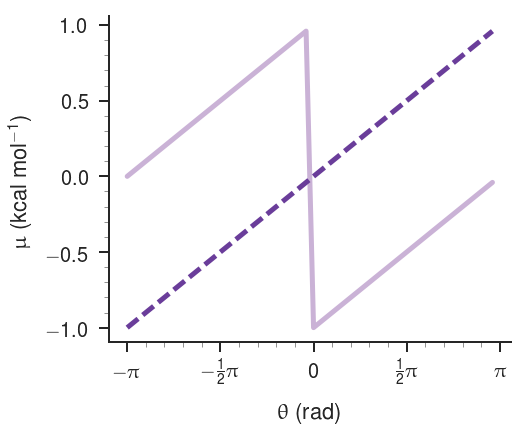

In [7]:
plot_energy(this)

Create a series of 6, small, sawtooth waves that are 10 bins wide, 0.2 kcal per mol high.

In [16]:
period = 5
[variable_saw(0.2, i, period) for i in range(period)]

[0.0,
 0.040000000000000008,
 0.080000000000000016,
 -0.080000000000000016,
 -0.039999999999999994]

In [22]:
several_small_saws = [[variable_saw(0.2, i, period) for i in range(period)] for j in range(6)]
saws = [item for sublist in several_small_saws for item in sublist]

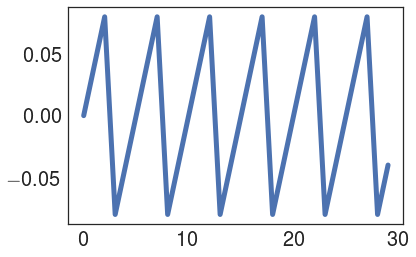

In [23]:
plt.plot(saws)

In [31]:
main_saw = [saw(i + 15, 30) for i in range(30)]

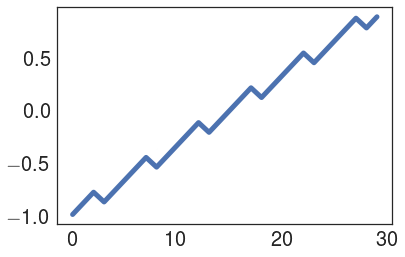

In [35]:
plt.plot([i + j for i,j in zip(main_saw, saws)])